In [1]:
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from highlight_text import ax_text
from dateutil.relativedelta import relativedelta
import matplotlib as mpl
from matplotlib import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from urllib import response
import sys
from distutils import core
import os
import matplotlib.font_manager as fm
from highlight_text import ax_text
from matplotlib.offsetbox import OffsetImage,AnnotationBbox


module_path = os.path.abspath(os.path.join('../../../'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\utils")
    sys.path.append(module_path+"\\assets")

from tukan_helper_functions import get_tukan_api_request

# For creating cool charts :)
plt.style.use(module_path + '\\utils\\tukan_style.mpl')

In [2]:
path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Teko\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Dosis\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

path = [x for x in sys.path if "assets" in x][0] + "\\fonts\\Comfortaa\\"

for x in os.listdir(path):
    if x.split(".")[-1] == "ttf":
        fm.fontManager.addfont(path + "/" + x)
        try:
            fm.FontProperties(weight=x.split(
                "-")[-1].split(".")[0].lower(), fname=x)
        except:
            x

In [12]:
payload = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "employment_status",
        "geography",
        "occupations",
        "sex"
    ],
    "categories": {
        "employment_status": "all",
        "geography": "all",
        "occupations": [
            "843321322a3e19e"
        ],
        "sex": "all"
    },
    "request": [
        {
            "table": "mex_inegi_enoe_occupation",
            "variables": [
                "841b3b57985bb68",
                "f1ce87968fcae85"
            ]
        }
    ],
    "from": "2012-06-16"
}

response = get_tukan_api_request(payload)

Success getting the data


In [13]:
data = response["data"]

In [15]:
data.loc[:,"prod_wage"] = data["f1ce87968fcae85"]*data["841b3b57985bb68"]
data_group = data.groupby(["sex", "date"]).sum().reset_index()
data_group

,sex,date,841b3b57985bb68,f1ce87968fcae85,prod_wage
0,Femenino,2012-07-01,34151.0,212299.507679,1.686814e+08
1,Femenino,2012-10-01,33336.0,166939.012508,1.069802e+08
2,Femenino,2013-01-01,29168.0,289049.331971,7.523051e+08
3,Femenino,2013-04-01,25717.0,180794.012186,9.440067e+07
4,Femenino,2013-07-01,33802.0,217214.810820,1.840913e+08
...,...,...,...,...,...
69,Masculino,2020-10-01,199269.0,486636.950504,1.584183e+09
70,Masculino,2021-01-01,200587.0,515345.977844,2.198312e+09
71,Masculino,2021-04-01,217657.0,595715.057132,2.320895e+09
72,Masculino,2021-07-01,259738.0,515249.463551,2.047725e+09


In [16]:
data_group.loc[:,"avg_wage"] = data_group["prod_wage"]/data_group["841b3b57985bb68"]
data_group

,sex,date,841b3b57985bb68,f1ce87968fcae85,prod_wage,avg_wage
0,Femenino,2012-07-01,34151.0,212299.507679,1.686814e+08,4939.281514
1,Femenino,2012-10-01,33336.0,166939.012508,1.069802e+08,3209.148368
2,Femenino,2013-01-01,29168.0,289049.331971,7.523051e+08,25792.139742
3,Femenino,2013-04-01,25717.0,180794.012186,9.440067e+07,3670.749699
4,Femenino,2013-07-01,33802.0,217214.810820,1.840913e+08,5446.165907
...,...,...,...,...,...,...
69,Masculino,2020-10-01,199269.0,486636.950504,1.584183e+09,7949.971707
70,Masculino,2021-01-01,200587.0,515345.977844,2.198312e+09,10959.392907
71,Masculino,2021-04-01,217657.0,595715.057132,2.320895e+09,10663.082515
72,Masculino,2021-07-01,259738.0,515249.463551,2.047725e+09,7883.808715


In [18]:
data_wages = data_group[data_group["date"].dt.month == data_group["date"].max().month]
data_wages.loc[:,"lag"] = data_wages.groupby(["sex"])["841b3b57985bb68"].shift()
data_wages.loc[:,"yoy_change"] = data_wages["841b3b57985bb68"]/data_wages["lag"] - 1
data_plot = data_wages.pivot(columns="sex", index = "date", values = "yoy_change")
data_wages = data_wages.pivot(columns="sex", index = "date", values = "841b3b57985bb68")

C:\Users\migue\AppData\Local\Temp\ipykernel_23344\76687335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wages.loc[:,"lag"] = data_wages.groupby(["sex"])["841b3b57985bb68"].shift()
C:\Users\migue\AppData\Local\Temp\ipykernel_23344\76687335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wages.loc[:,"yoy_change"] = data_wages["841b3b57985bb68"]/data_wages["lag"] - 1


In [19]:
data_plot.dropna(inplace = True)
data_plot

sex,Femenino,Masculino
date,,
2013-10-01,-0.208303,0.345426
2014-10-01,0.190361,-0.070566
2015-10-01,-0.167017,0.041843
2016-10-01,-0.006420,0.017132
2017-10-01,0.343641,0.171283
2018-10-01,0.200738,0.003051
2019-10-01,-0.035162,0.041289
2020-10-01,0.109453,0.119344
2021-10-01,0.323089,0.324100


In [9]:
import matplotlib.patches as mpatches
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)

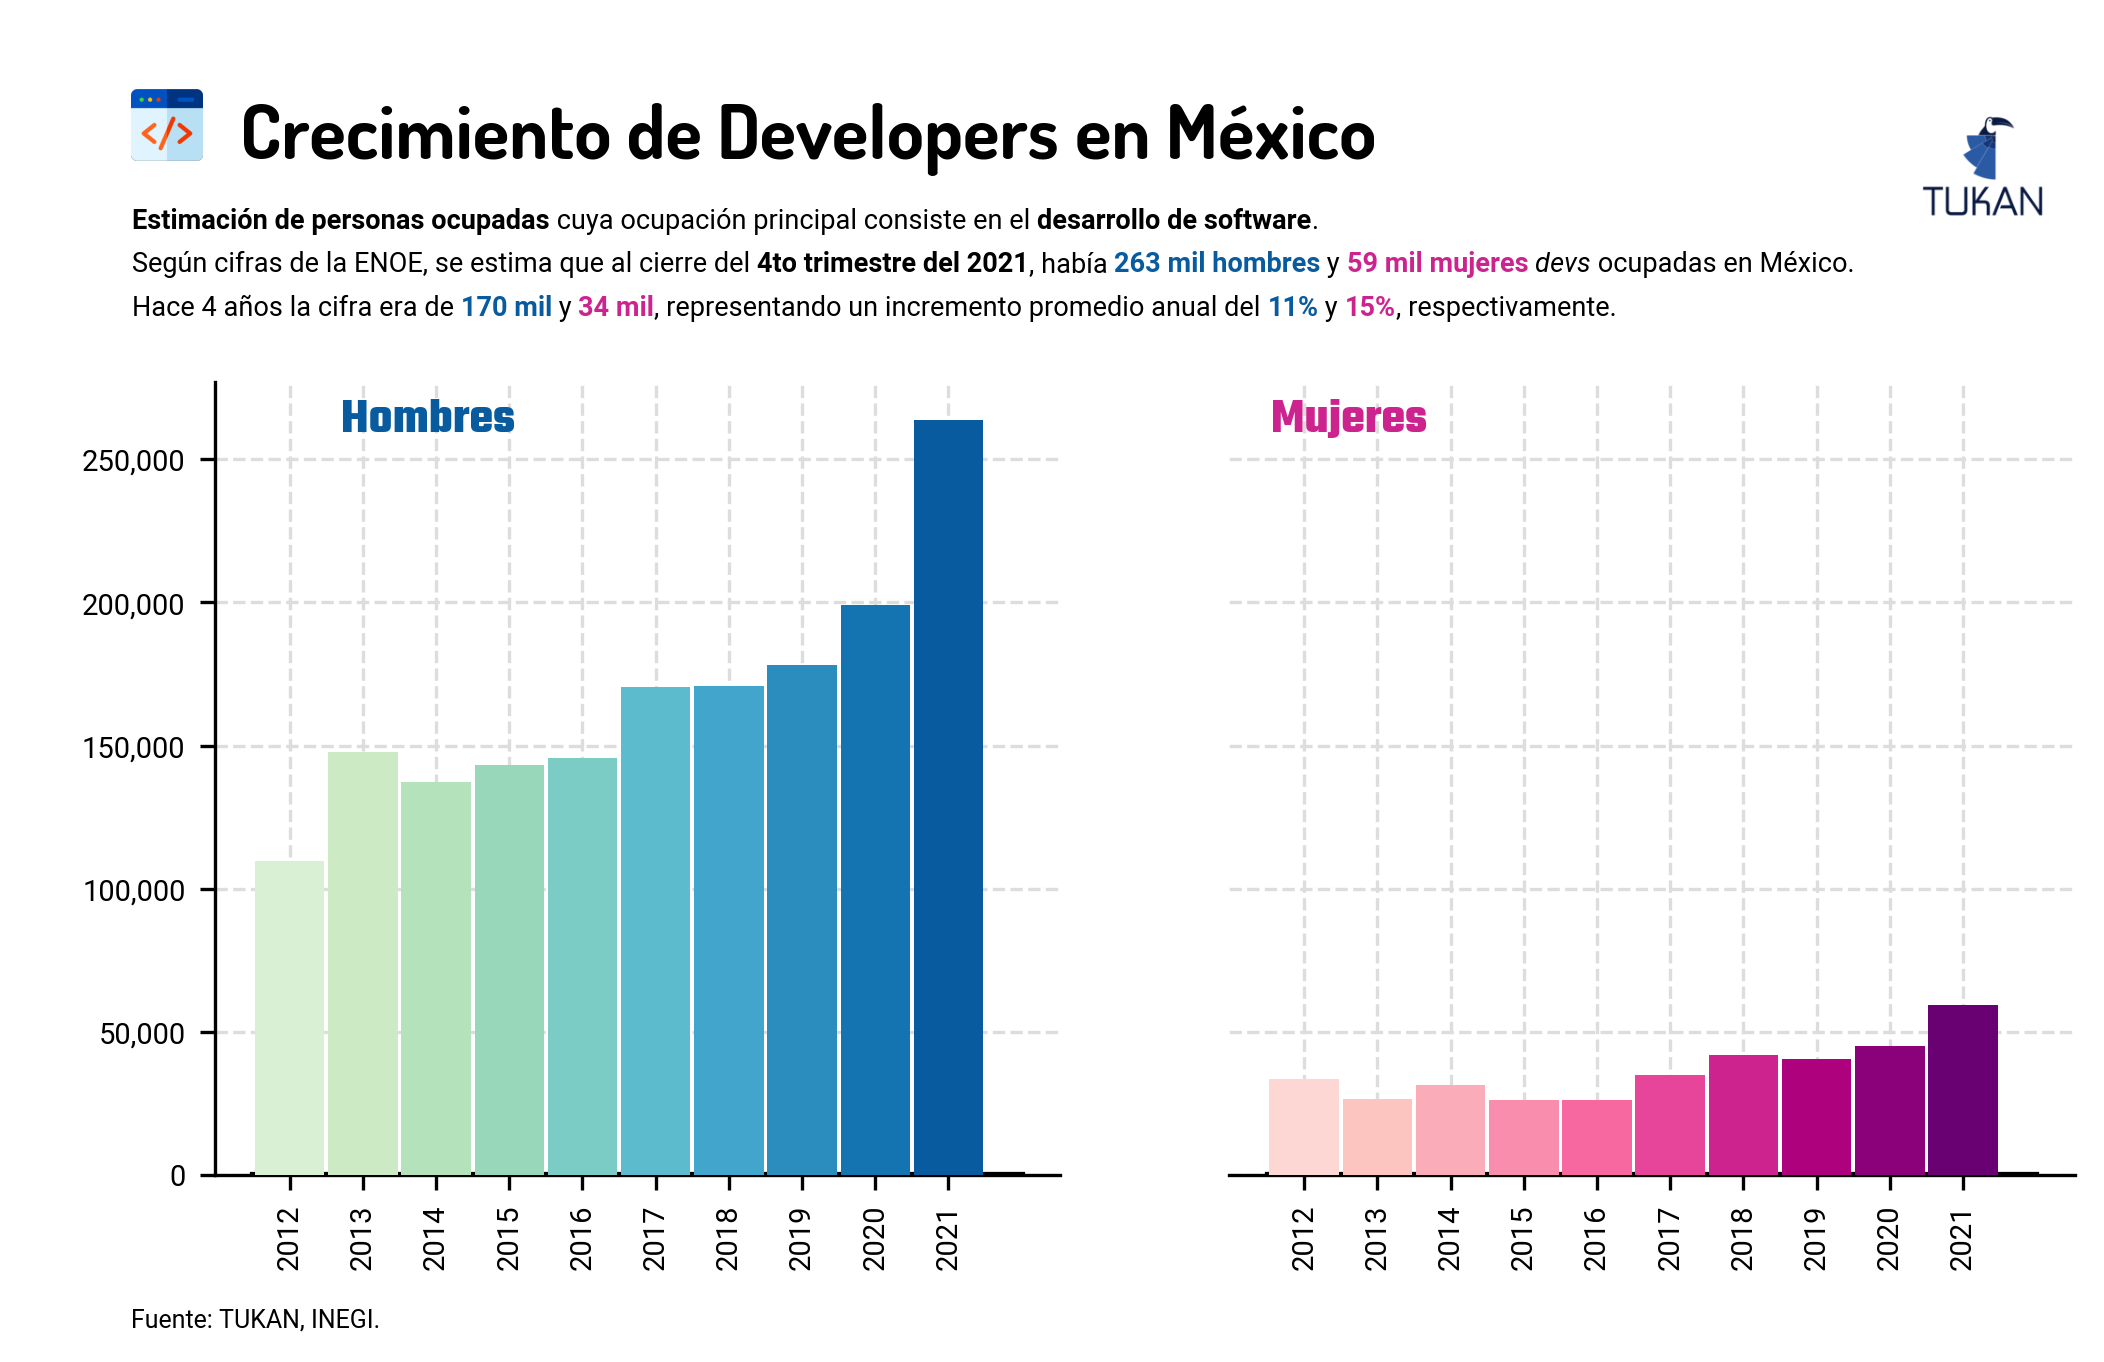

In [10]:
fig = plt.figure(figsize=(8, 3.5), dpi = 300)
ax = plt.subplot(1, 2, 1, frameon=True)
ax2 = plt.subplot(1, 2, 2, frameon=True)


n = 10
X = 0 + np.arange(n)
width = 0.95
cmap_men = mpl.cm.get_cmap("GnBu_r", 13)
cmap_wm = mpl.cm.get_cmap("RdPu_r", 13)

ax.plot([0 - 0.5, 0 + n], [0, 0], color="black", lw=1.5)
ax2.plot([0 - 0.5, 0 + n], [0, 0], color="black", lw=1.5)

ax.bar(X, data_wages["Masculino"], width = width, zorder = 3, color=[cmap_men(i) for i in range(n,0,-1)])
ax2.bar(X, data_wages["Femenino"], width = width, zorder = 3, color=[cmap_wm(i) for i in range(n,0,-1)])


# Add minor gridlines and format ticks
xticks = ax.xaxis.set_ticks(X)
xticklabels = ax.xaxis.set_ticklabels([str(round(x)) for x in range(2012,2022)], rotation = 90)

xticks = ax2.xaxis.set_ticks(X)
xticklabels = ax2.xaxis.set_ticklabels([str(round(x)) for x in range(2012,2022)], rotation = 90)


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.tick_params(axis='both', colors='black', labelsize = 7)

ax2.tick_params(axis='y', colors='white', labelsize = 0)
ax2.tick_params(axis='x', colors='black', labelsize = 7)
ax2.spines['left'].set_visible(False)



ax2.set_ylim(ax.get_ylim())



tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.73, 1, 0.17, 0.17], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

dev_icon = image.imread("dev.png")
dev_ax = fig.add_axes([0.09, 1.09, 0.03, 0.07], zorder=1)
dev_ax.imshow(dev_icon)
dev_ax.axis("off")

ax_text(x = 0.1, y = 1.2,
        s = "Crecimiento de <Developers> en México",
        highlight_textprops = [{"weight": "bold", "size":18}],
        ax = ax, weight = "bold", font = "Dosis", ha = "left", size = 18, annotationbbox_kw = {"xycoords":"figure fraction"})
ax_text(x = 0.055, y = 1.1,
    s = "<Estimación de personas ocupadas> cuya ocupación principal consiste en el <desarrollo de software>.\nSegún cifras de la ENOE, se estima que al cierre del <4to trimestre del 2021>, había <263 mil hombres> y <59 mil mujeres> <devs> ocupadas en México.\nHace 4 años la cifra era de <170 mil> y <34 mil>, representando un incremento promedio anual del <11%> y <15%>, respectivamente.",
    highlight_textprops = [{"weight":"bold"},{"weight":"bold"}, {"weight":"bold"},{"weight":"bold", "color":cmap_men(1)}, {"weight":"bold", "color":cmap_wm(4)}, {"style":"italic"}, {"weight":"bold", "color":cmap_men(1)}, {"weight":"bold", "color":cmap_wm(4)}, {"weight":"bold", "color":cmap_men(1)}, {"weight":"bold", "color":cmap_wm(4)}],
    ax = ax, font = "Roboto", ha = "left", va = "top", size = 6.5,  annotationbbox_kw = {"xycoords":"figure fraction"})


ax_text(x = 0.15, y = 0.98,
        s = "Hombres",
        ax = ax, weight = "bold", font = "Teko", ha = "left", size = 12, annotationbbox_kw = {"xycoords":"axes fraction"}, color=cmap_men(1))

ax_text(x = 0.05, y = 0.98,
        s = "Mujeres",
        ax = ax2, weight = "bold", font = "Teko", ha = "left", size = 12, annotationbbox_kw = {"xycoords":"axes fraction"}, color=cmap_wm(4))

# # Logo and source text

fig.text(0.09, -0.02, "Fuente: TUKAN, INEGI.", fontsize=6)


plt.savefig(
    "devs_men_vs_women_yoy_transparent.png",
    dpi=300,
    bbox_inches="tight",
    edgecolor="none",
    transparent=True,
)

In [93]:
data_group2 = data.groupby(["date", "geography"]).sum().reset_index()
data_group2["avg_wage"] = data_group2["prod_wage"]/data_group2["841b3b57985bb68"]
top_4 = data_group2[data_group2["date"] == data_group2["date"].max()].sort_values(by = "841b3b57985bb68", ascending = False).head(4)["geography"]

data_group2 = data_group2[data_group2["geography"].isin(top_4)]
data_group2 = data_group2[data_group2["date"] > "2013-12-01"]

data_group2[data_group2["date"] == data_group2["date"].max()]["841b3b57985bb68"]/323264.0


1158    0.181632
1162    0.189935
1166    0.091616
1170    0.079449
Name: 841b3b57985bb68, dtype: float64

In [90]:
data_national = data.groupby(["date"]).sum().reset_index()
data_national["avg_wage"] = data_national["prod_wage"]/data_national["841b3b57985bb68"]

data_national = data_national[data_national["date"] > "2013-12-01"]
data_national

,date,841b3b57985bb68,f1ce87968fcae85,prod_wage,avg_wage
6,2014-01-01,162001.0,588046.613066,8.359421e+08,5160.104660
7,2014-04-01,140610.0,654816.124584,8.706630e+08,6192.042081
8,2014-07-01,157497.0,600648.250326,8.706280e+08,5527.902170
9,2014-10-01,168738.0,636092.641497,8.919555e+08,5286.038017
10,2015-01-01,156376.0,683511.285174,1.177971e+09,7532.941302
11,2015-04-01,166341.0,619156.220802,1.084310e+09,6518.597273
12,2015-07-01,150968.0,631979.603541,1.019432e+09,6752.638500
13,2015-10-01,169237.0,567893.694416,1.118209e+09,6607.357641
14,2016-01-01,185083.0,556406.341984,1.345261e+09,7268.419623
15,2016-04-01,182184.0,566617.217400,1.028453e+09,5645.131268


C:\Users\migue\AppData\Local\Temp\ipykernel_23344\14245169.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticklabels = ax.xaxis.set_ticklabels([str(round(x)) for x in range(2013,2022)], rotation = 90)
C:\Users\migue\AppData\Local\Temp\ipykernel_23344\14245169.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticklabels = ax.xaxis.set_ticklabels([str(round(x)) for x in range(2013,2022)], rotation = 90)
C:\Users\migue\AppData\Local\Temp\ipykernel_23344\14245169.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticklabels = ax.xaxis.set_ticklabels([str(round(x)) for x in range(2013,2022)], rotation = 90)
C:\Users\migue\AppData\Local\Temp\ipykernel_23344\14245169.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticklabels = ax.xaxis.set_ticklabels([str(round(x)) for x in range(2013,2022)], rotation = 90)


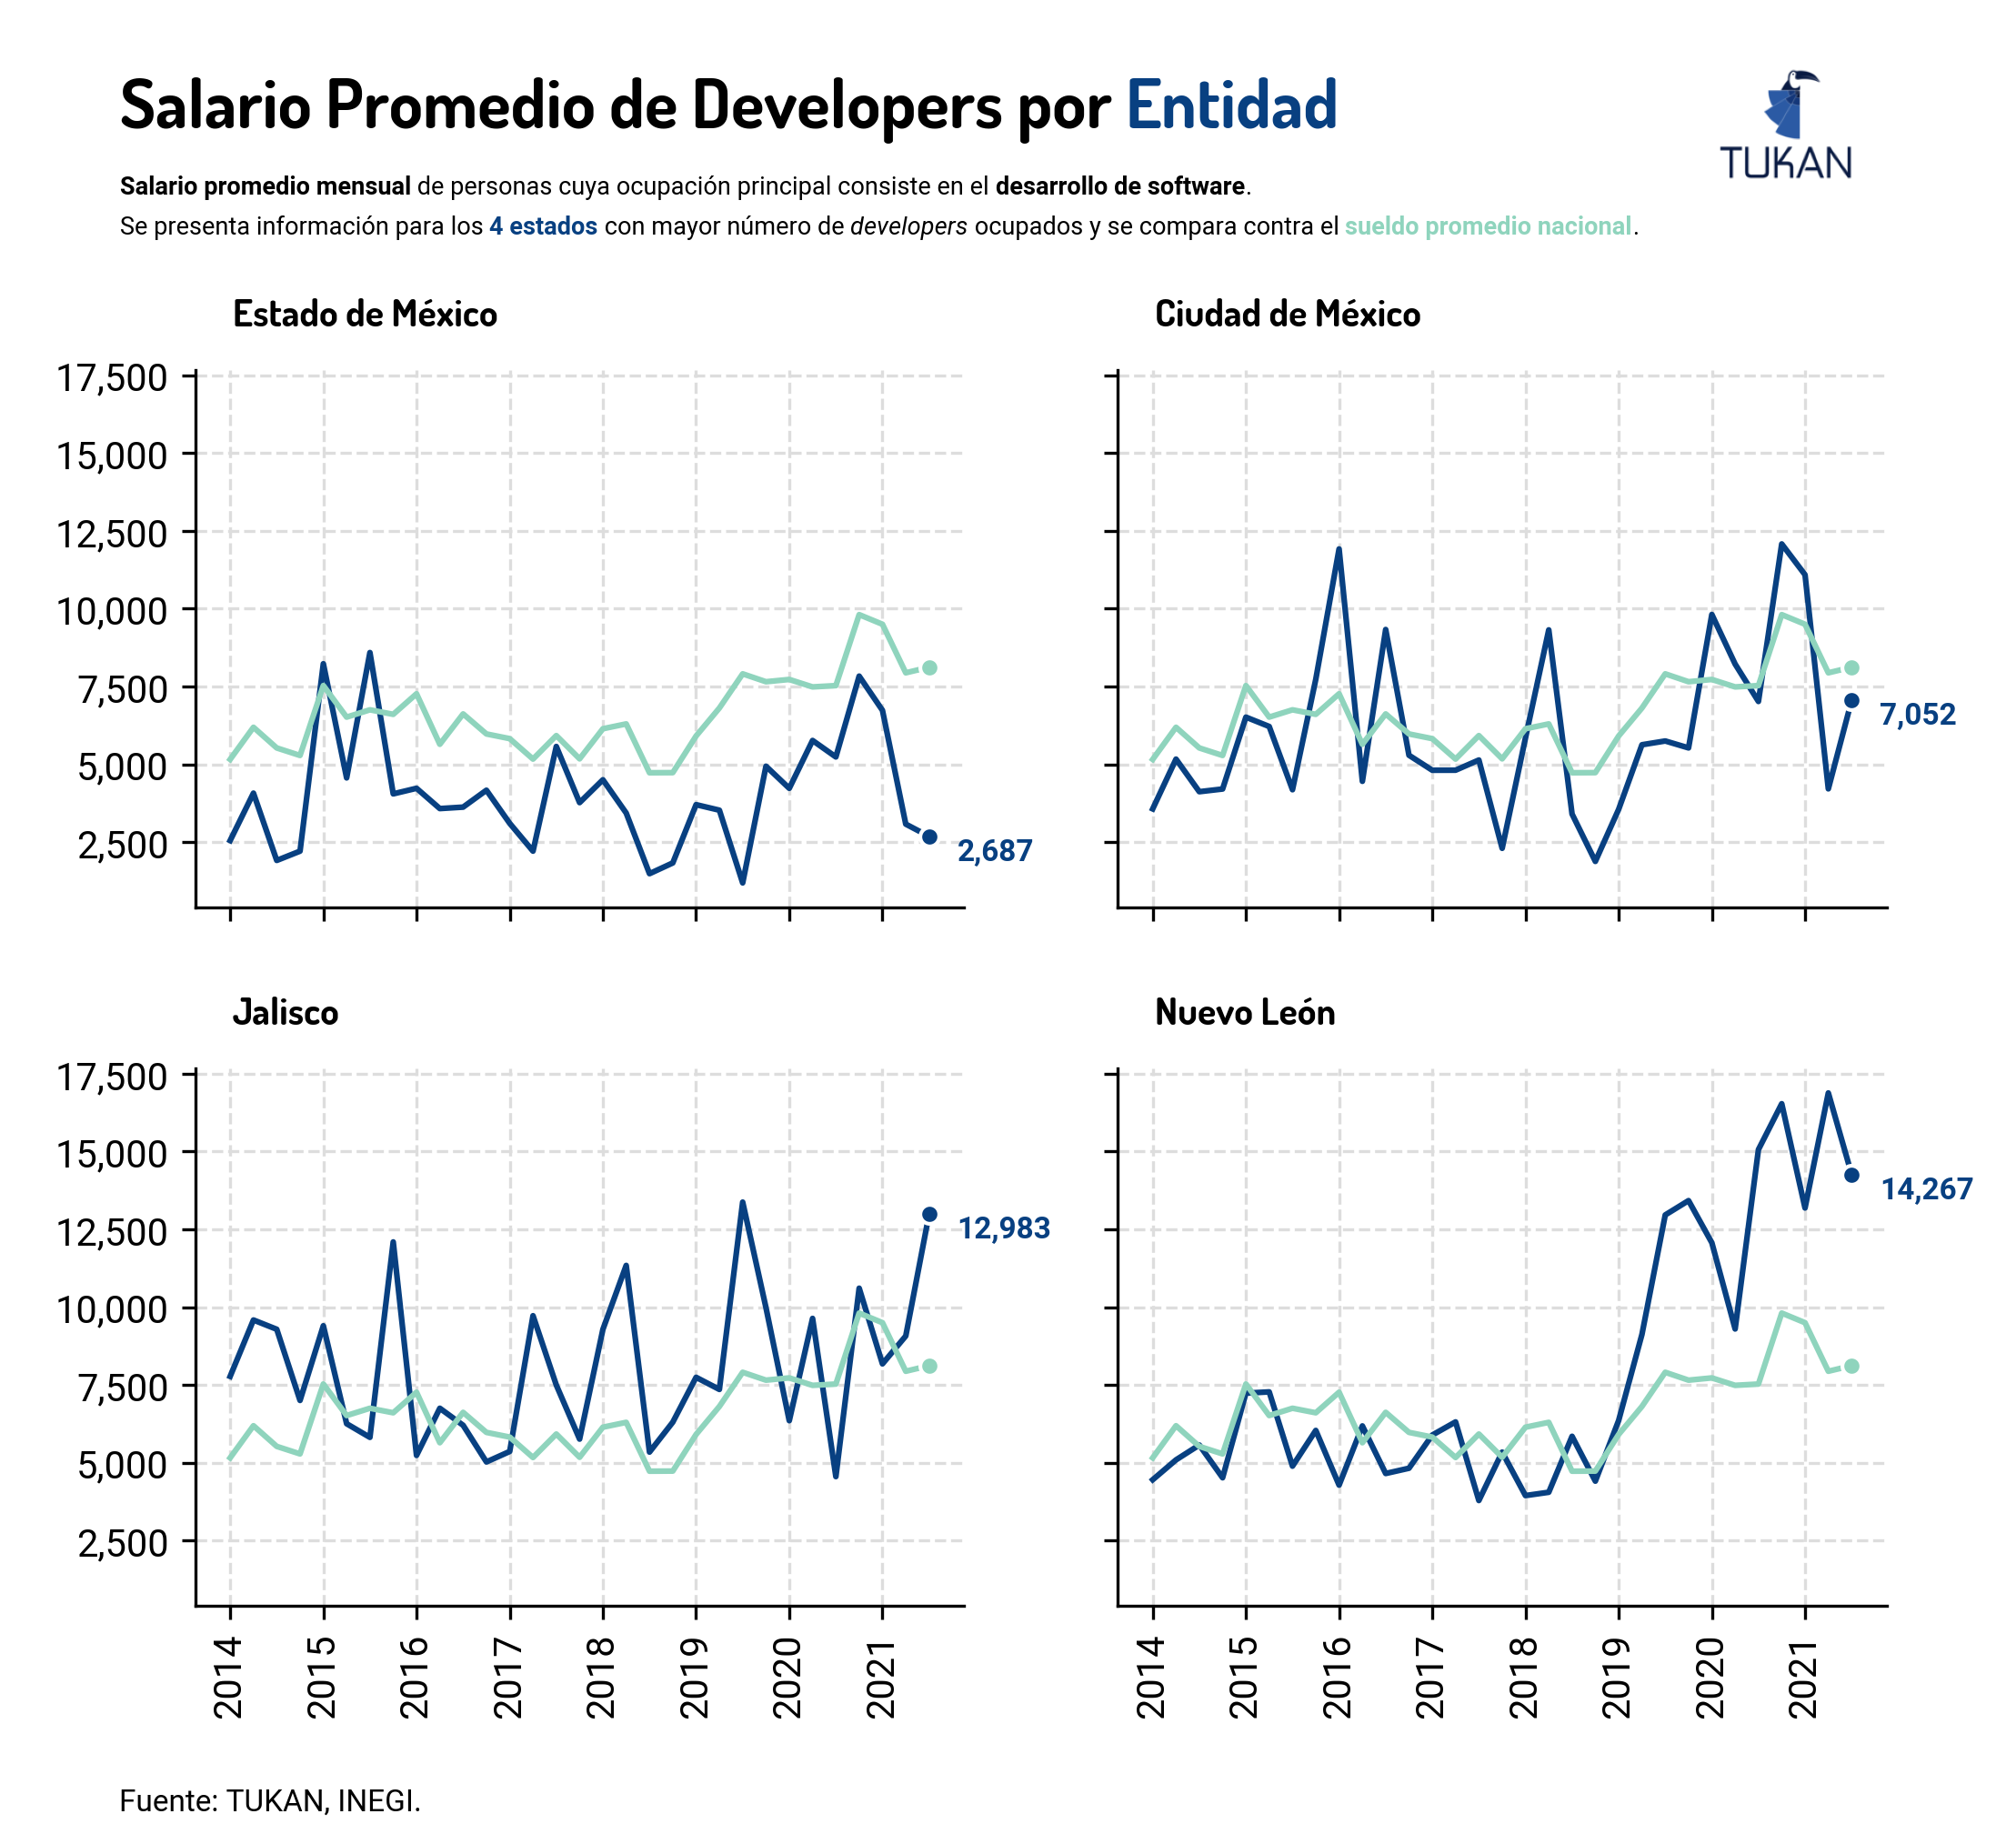

In [88]:
fig = plt.figure(figsize=(8,6), dpi = 300)
gs = fig.add_gridspec(2, 2, hspace = 0.3)
axs = gs.subplots(sharex=True, sharey=True)

cmap = mpl.cm.get_cmap("GnBu_r", 10)

aux_index = 0

for index, state_m in enumerate(top_4):
    if index > 1:
        aux_index = 1
        index = index - 2
    aux_df = data_group2[data_group2["geography"] == state_m]
    ax = axs[aux_index, index]
    ax.plot(np.arange(aux_df["avg_wage"].shape[0]), aux_df["avg_wage"], marker = "o", ms = 5, mec = "white", markevery = [-1], color  = cmap(0))
    ax.plot(np.arange(data_national["avg_wage"].shape[0]), data_national["avg_wage"], marker = "o", ms = 5, mec = "white", markevery = [-1], color  = cmap(5))
    ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
    xticklabels = ax.xaxis.set_ticklabels([str(round(x)) for x in range(2013,2022)], rotation = 90)

    Y_end = aux_df["avg_wage"].iloc[-1]
    Y_max = ax.get_ylim()[1] + (ax.get_ylim()[1] - ax.get_ylim()[0])/8
    X_max = aux_df["avg_wage"].shape[0]
    X_min = 0

    ax_text(x = X_max + 0.2, y = Y_end,
            s = f"<{Y_end:,.0f}>",
            highlight_textprops=[{"color": cmap(0)}], 
                            ax = ax, weight = "bold", font = "Roboto", ha = "left", size = 8)

    ax_text(x = X_min + 0.1, y = 20000,
            s = f"<{state_m}>",
            highlight_textprops=[{"color": "black"}], 
                            ax = ax, weight = "bold", font = "Dosis", ha = "left", size = 10)

    ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))


ax_text(x = 0.055, y = 1.08,
        s = "Salario Promedio de Developers por <Entidad>",
        highlight_textprops = [{"weight": "bold", "size":18, "color":cmap(0)}],
        ax = ax, weight = "bold", font = "Dosis", ha = "left", size = 18, annotationbbox_kw = {"xycoords":"figure fraction"})

ax_text(x = 0.055, y = 1.02,
    s = "<Salario promedio mensual> de personas cuya ocupación principal consiste en el <desarrollo de software>.\nSe presenta información para los <4 estados> con mayor número de <developers> ocupados y se compara contra el <sueldo promedio nacional>.",
    highlight_textprops = [{"weight":"bold"},{"weight":"bold"},{"weight":"bold", "color":cmap(0)}, {"style":"italic"}, {"weight":"bold", "color":cmap(5)}],
    ax = ax, font = "Roboto", ha = "left", va = "top", size = 6.5,  annotationbbox_kw = {"xycoords":"figure fraction"})



fig.text(0.09, 0.0, "Fuente: TUKAN, INEGI.", fontsize=8)

# Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/state_wages_devs_no_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.78, 0.97, 0.12, 0.12], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/state_wages_devs_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/state_wages_devs_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)



In [95]:
data_informal = data.groupby(["date", "employment_status"]).sum().reset_index()

In [98]:
data_informal = data_informal.pivot(columns = "employment_status", values = "841b3b57985bb68", index = "date")
data_informal.loc[:,"informal_rate"] = data_informal["Ocupado informalmente"]/(data_informal["Ocupado formalmente"] + data_informal["Ocupado informalmente"])

employment_status,Ocupado formalmente,Ocupado informalmente,informal_rate
date,,,
2012-07-01,113373.0,26371.0,0.188709
2012-10-01,114860.0,28291.0,0.197630
2013-01-01,116726.0,27797.0,0.192336
2013-04-01,138403.0,23845.0,0.146966
2013-07-01,134973.0,21864.0,0.139406
2013-10-01,143669.0,30471.0,0.174980
2014-01-01,137897.0,24104.0,0.148789
2014-04-01,123579.0,17031.0,0.121122
2014-07-01,128313.0,29184.0,0.185299


In [104]:
payload_2 = {
    "type": "data_table",
    "operation": "sum",
    "language": "es",
    "group_by": [
        "employment_status",
        "occupations",
        "geography",
        "sex"
    ],
    "categories": {
        "employment_status": [
            "6dba661f2aa6ffc",
            "f9bcb5ed31ee5be"
        ],
        "occupations": [
            "d049c4d2be696c1"
        ],
        "geography": [
            "b815762a2c6a283"
        ],
        "sex": [
            "fb2fa3c93cb0a9e"
        ]
    },
    "request": [
        {
            "table": "mex_inegi_enoe_occupation",
            "variables": [
                "841b3b57985bb68"
            ]
        }
    ],
    "from": "2012-01-17"
}

response = get_tukan_api_request(payload_2)

Success getting the data


In [105]:
data_national_informal = response["data"]
data_national_informal = data_national_informal.groupby(["date", "employment_status"]).sum().reset_index()
data_national_informal = data_national_informal.pivot(columns = "employment_status", values = "841b3b57985bb68", index = "date")
data_national_informal.loc[:,"informal_rate"] = data_national_informal["Ocupado informalmente"]/(data_national_informal["Ocupado formalmente"] + data_national_informal["Ocupado informalmente"])

In [108]:
data_informal.tail(5)

employment_status,Ocupado formalmente,Ocupado informalmente,informal_rate
date,,,
2020-10-01,213178.0,30995.0,0.126939
2021-01-01,237953.0,25755.0,0.097665
2021-04-01,241541.0,44667.0,0.156065
2021-07-01,275073.0,45844.0,0.142853
2021-10-01,267324.0,55940.0,0.173047


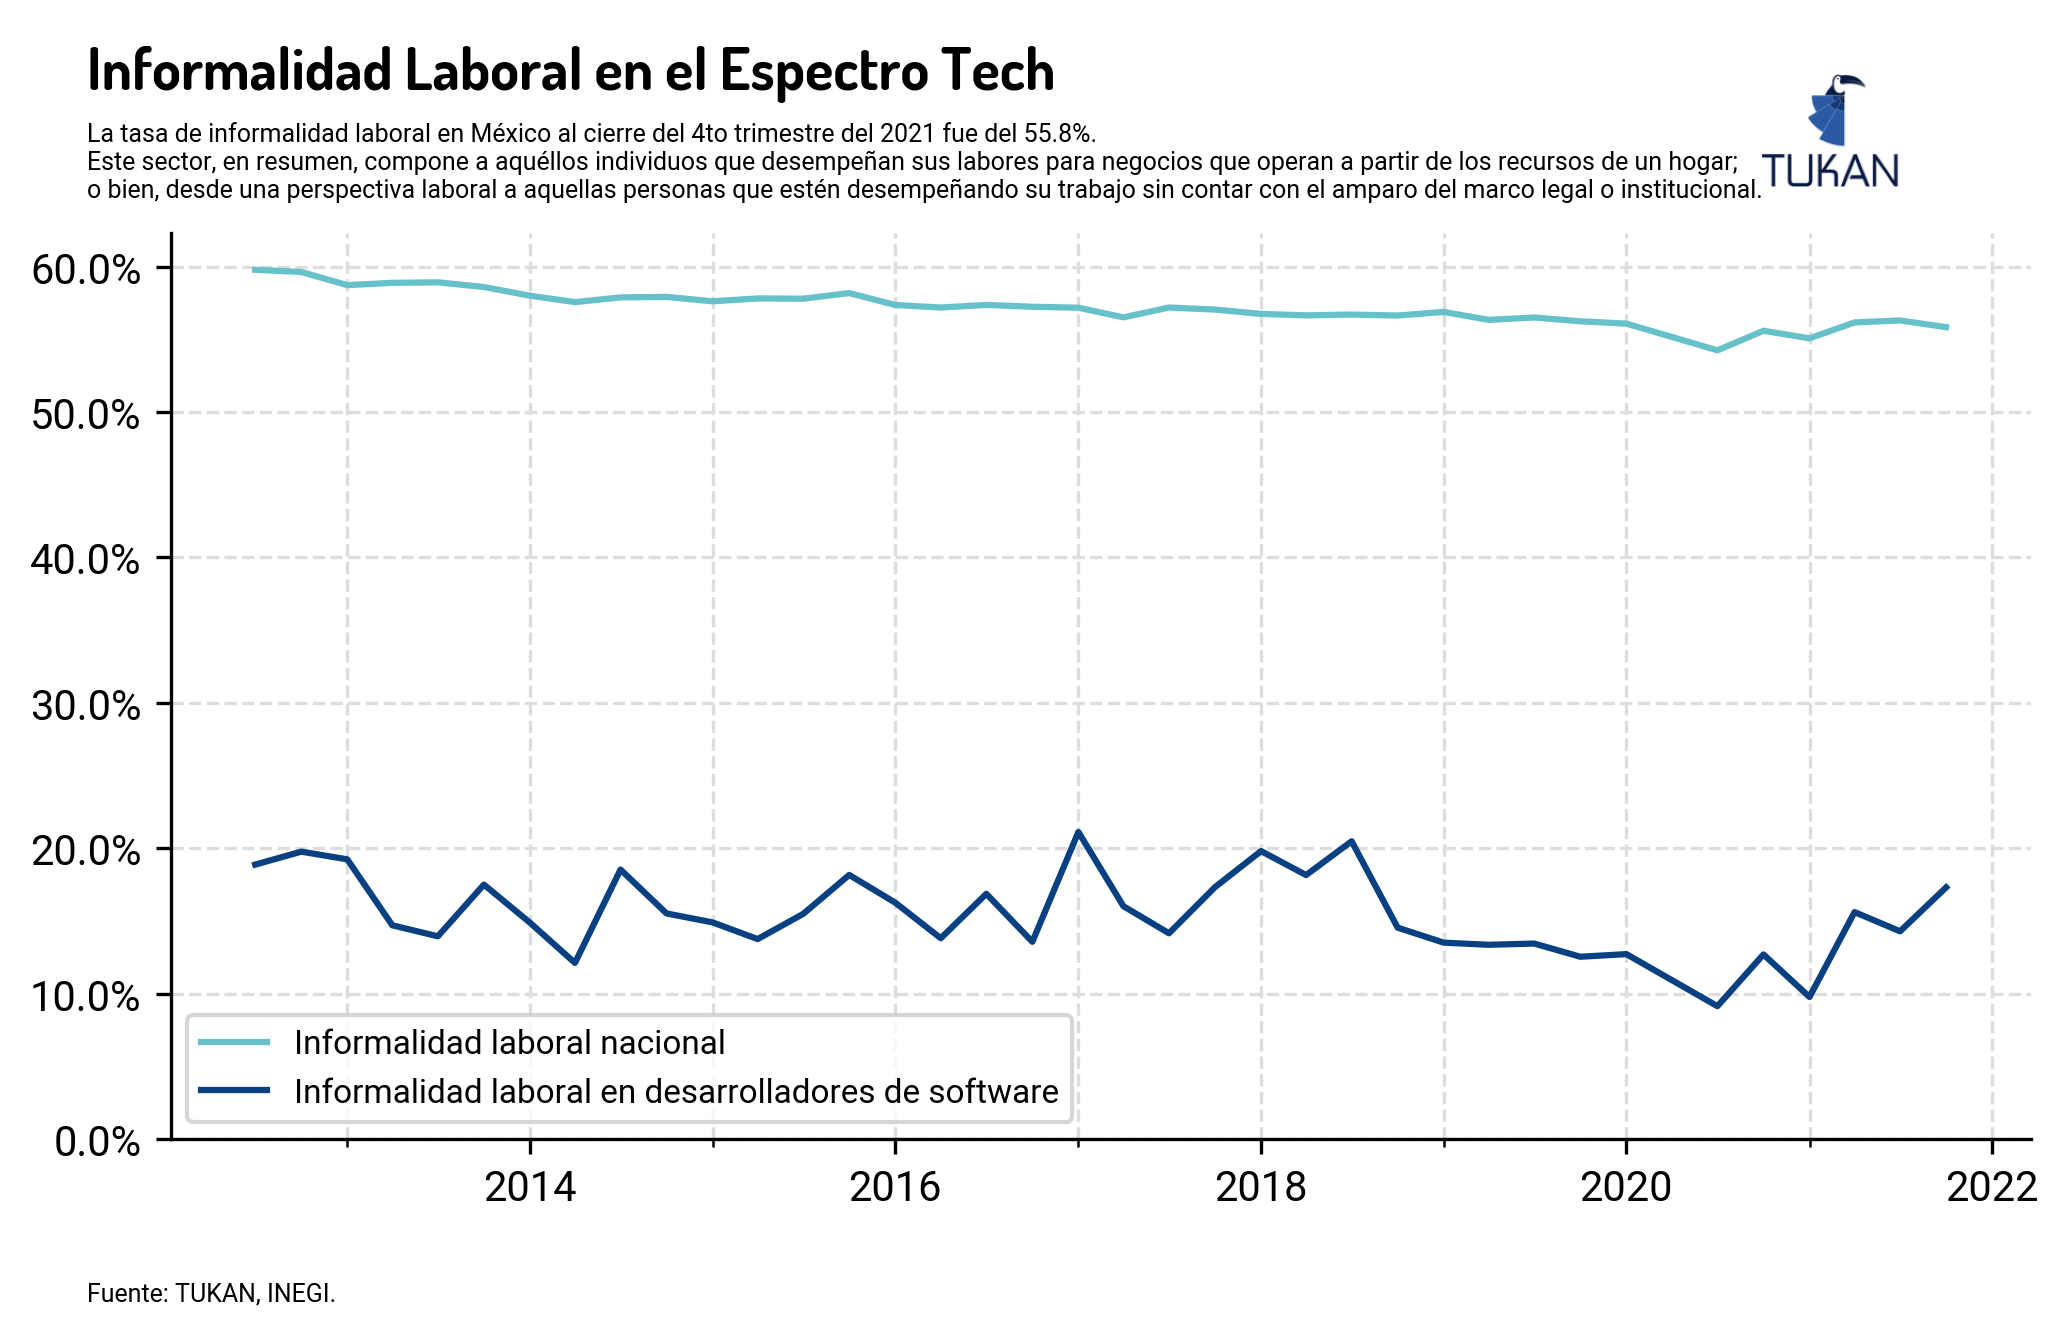

In [114]:

fig = plt.figure(dpi=300, figsize=(8,4))
ax = plt.subplot(111)

ax.plot(data_national_informal.index, data_national_informal["informal_rate"], color = cmap(4), label = "Informalidad laboral nacional")
ax.plot(data_informal.index, data_informal["informal_rate"], color = cmap(0),
        label = "Informalidad laboral en desarrolladores de software")




ax.legend(fancybox = True, fontsize = 8, frameon = True)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.1%}'))
# Add minor gridlines and format ticks
ax.xaxis.set_major_locator(mdates.YearLocator(2))
ax.xaxis.set_minor_locator(mdates.YearLocator(1))

ax.grid(visible=True, which='both', linestyle='--', color = "#dddddd")

ax.set_ylim(0)

fig.text(
    0.09,
    1,
    "Informalidad Laboral en el Espectro Tech",
    size=14,
    weight = "bold",
    font = "Dosis"
)
fig.text(
    0.09,
    0.91,
    "La tasa de informalidad laboral en México al cierre del 4to trimestre del 2021 fue del 55.8%.\nEste sector, en resumen, compone a aquéllos individuos que desempeñan sus labores para negocios que operan a partir de los recursos de un hogar;\no bien, desde una perspectiva laboral a aquellas personas que estén desempeñando su trabajo sin contar con el amparo del marco legal o institucional.",
    size=6
)
# Add footer
fig.text(0.09, -0.01, "Fuente: TUKAN, INEGI.", fontsize=6)

# Save plot with TUKAN logo, transparent and white
plt.savefig(
    "plots/informality_tech_no_logo.svg",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/informality_tech_white_nologo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.72, .88, 0.14, 0.17], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

plt.savefig(
    "plots/informality_tech_logo.png",
    dpi=300,
    bbox_inches="tight",
    # facecolor="white",
    edgecolor="none",
    transparent=True,
)

plt.savefig(
    "plots/informality_tech_white_logo.png",
    dpi=300,
    bbox_inches="tight",
    facecolor="white",
    edgecolor="none",
    transparent=False,
)

In [115]:
data_wages = data_group[data_group["date"].dt.month == data_group["date"].max().month]
data_wages.loc[:,"lag"] = data_wages.groupby(["sex"])["841b3b57985bb68"].shift()
data_wages.loc[:,"yoy_change"] = data_wages["841b3b57985bb68"]/data_wages["lag"] - 1
data_plot = data_wages.pivot(columns="sex", index = "date", values = "avg_wage")
data_plot

C:\Users\migue\AppData\Local\Temp\ipykernel_23344\980028332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wages.loc[:,"lag"] = data_wages.groupby(["sex"])["841b3b57985bb68"].shift()
C:\Users\migue\AppData\Local\Temp\ipykernel_23344\980028332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wages.loc[:,"yoy_change"] = data_wages["841b3b57985bb68"]/data_wages["lag"] - 1


sex,Femenino,Masculino
date,,
2012-10-01,3209.148368,5396.829668
2013-10-01,5412.103289,5803.389149
2014-10-01,4515.532308,5462.311356
2015-10-01,8115.988765,6331.409365
2016-10-01,5669.031960,6032.769116
2017-10-01,4795.282803,5256.591573
2018-10-01,4589.742402,4769.820629
2019-10-01,7180.536764,7763.385383
2020-10-01,5669.500045,7949.971707


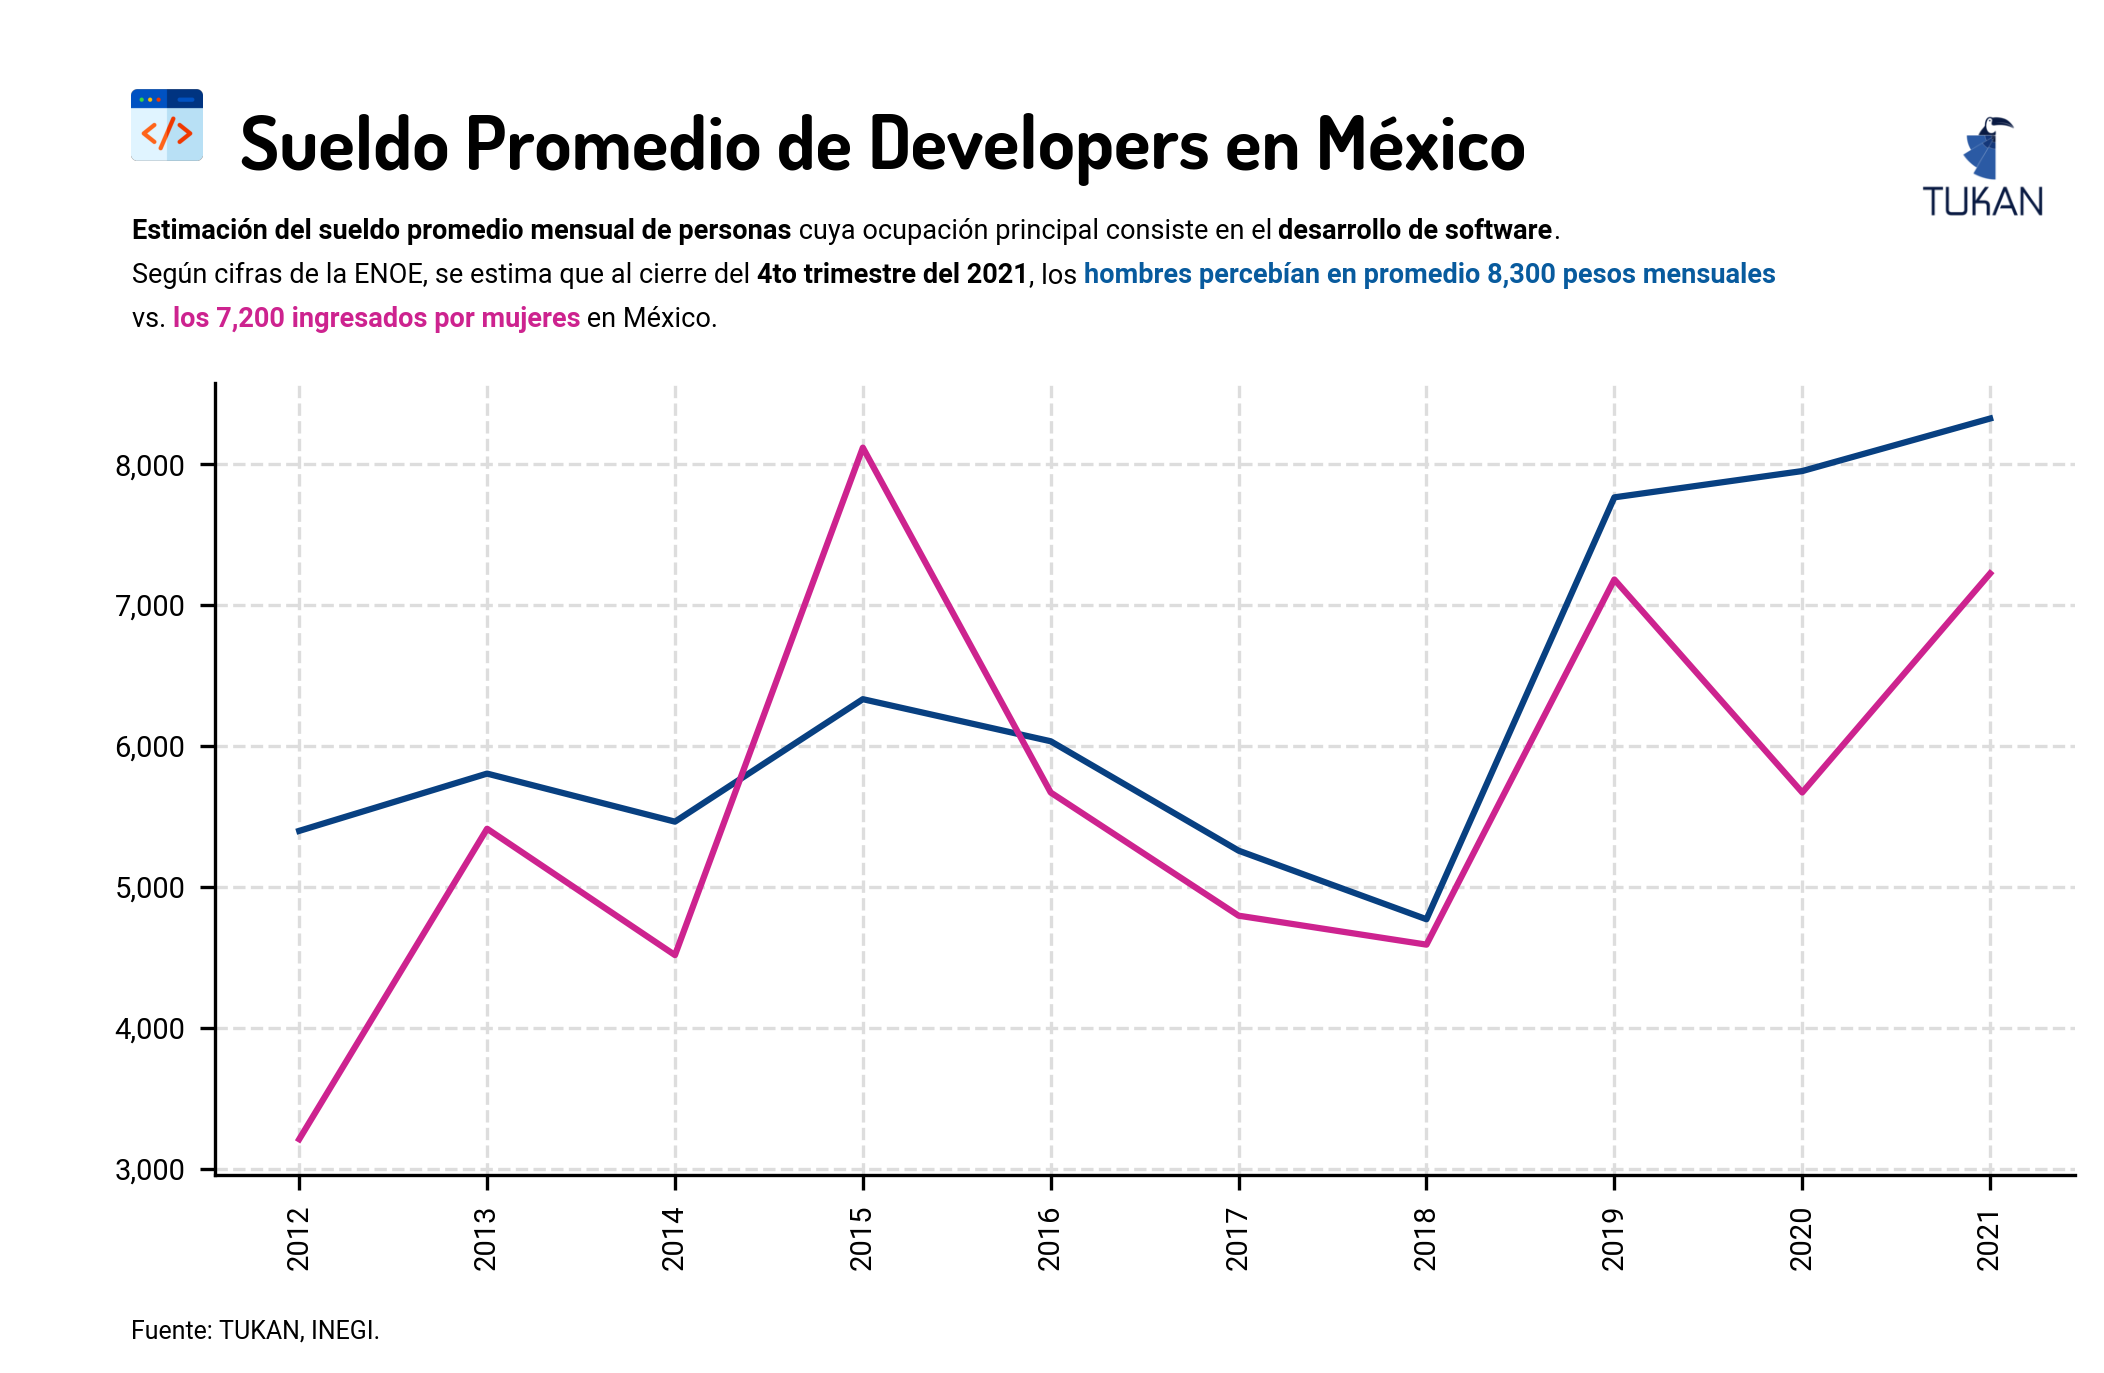

In [128]:
fig = plt.figure(figsize=(8, 3.5), dpi = 300)
ax = plt.subplot(1, 1, 1, frameon=True)



n = 10
X = 0 + np.arange(n)
width = 0.95
cmap_men = mpl.cm.get_cmap("GnBu_r", 13)
cmap_wm = mpl.cm.get_cmap("RdPu_r", 13)


ax.plot(X, data_plot["Masculino"], zorder = 3, color=cmap_men(0))
ax.plot(X, data_plot["Femenino"], zorder = 3, color=cmap_wm(4))


# # Add minor gridlines and format ticks
xticks = ax.xaxis.set_ticks(X)
xticklabels = ax.xaxis.set_ticklabels([str(round(x)) for x in range(2012,2022)], rotation = 90)

# xticks = ax2.xaxis.set_ticks(X)
# xticklabels = ax2.xaxis.set_ticklabels([str(round(x)) for x in range(2012,2022)], rotation = 90)


ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.0f}"))
ax.tick_params(axis='both', colors='black', labelsize = 7)

# ax2.tick_params(axis='y', colors='white', labelsize = 0)
# ax2.tick_params(axis='x', colors='black', labelsize = 7)
# ax2.spines['left'].set_visible(False)



# ax2.set_ylim(ax.get_ylim())



tukan_im = image.imread(module_path + "\\assets\\logo\\logo192.png")
newax = fig.add_axes([0.73, 1, 0.17, 0.17], anchor="NE", zorder=1)
newax.imshow(tukan_im)
newax.axis("off")

dev_icon = image.imread("dev.png")
dev_ax = fig.add_axes([0.09, 1.09, 0.03, 0.07], zorder=1)
dev_ax.imshow(dev_icon)
dev_ax.axis("off")

ax_text(x = 0.1, y = 1.2,
        s = "Sueldo Promedio de <Developers> en México",
        highlight_textprops = [{"weight": "bold", "size":18}],
        ax = ax, weight = "bold", font = "Dosis", ha = "left", size = 18, annotationbbox_kw = {"xycoords":"figure fraction"})
ax_text(x = 0.055, y = 1.1,
    s = "<Estimación del sueldo promedio mensual de personas> cuya ocupación principal consiste en el <desarrollo de software>.\nSegún cifras de la ENOE, se estima que al cierre del <4to trimestre del 2021>, los <hombres percebían en promedio 8,300 pesos mensuales> \nvs. <los 7,200 ingresados por mujeres> en México.",
    highlight_textprops = [{"weight":"bold"},{"weight":"bold"}, {"weight":"bold"},{"weight":"bold", "color":cmap_men(1)}, {"weight":"bold", "color":cmap_wm(4)}],
    ax = ax, font = "Roboto", ha = "left", va = "top", size = 6.5,  annotationbbox_kw = {"xycoords":"figure fraction"})




# # # Logo and source text

fig.text(0.09, -0.03, "Fuente: TUKAN, INEGI.", fontsize=6)


plt.savefig(
    "devs_men_vs_women_wages_transparent.png",
    dpi=300,
    bbox_inches="tight",
    edgecolor="none",
    transparent=True,
)